In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tqdm import tqdm
import math
import gc


In [3]:
# ! cp data/Train_target.csv ./raw_data/Train_target.csv
# ! cp data/Test_target.csv ./raw_data/Test_target.csv


In [18]:
train=pd.read_csv("./data/Train.csv")
test=pd.read_csv("./data/Test.csv")
sample_sub=pd.read_csv("./data/sample_sub.csv")
meta= pd.read_csv("./data/airqo_metadata.csv")

In [19]:
# covert features  from string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train[feature]=train[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])
    test[feature]=test[feature].apply(lambda x: [ replace_nan(X)  for X in x.replace("nan"," ").split(",")])    

In [6]:
#train.dtypes


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            15539 non-null  object 
 1   location      15539 non-null  object 
 2   temp          15539 non-null  object 
 3   precip        15539 non-null  object 
 4   rel_humidity  15539 non-null  object 
 5   wind_dir      15539 non-null  object 
 6   wind_spd      15539 non-null  object 
 7   atmos_press   15539 non-null  object 
 8   target        15539 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            5035 non-null   object
 1   location      5035 non-null   object
 2   temp          5035 non-null   object
 3   precip        5035 non-null   object
 4   rel_humidity  5035 non-null   object
 5   wind_dir      5035 non-null   object
 6   wind_spd      5035 non-null   object
 7   atmos_press   5035 non-null   object
dtypes: object(8)
memory usage: 314.8+ KB


In [25]:
#train.columns = [xs]

### Features engineering part

In [26]:
#The features are taken into groups for min, max, mean, std, var, median, ptp and the nan values are removed
def aggregate_features(x,col_name):
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    x["std_"+col_name]=x[col_name].apply(np.std)
    x["var_"+col_name]=x[col_name].apply(np.var)
    x["median_"+col_name]=x[col_name].apply(np.median)
    x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  
def remove_nan_values(x):
    return [e for e in x if not math.isnan(e)]


In [11]:
train.isna().sum()

ID              0
location        0
temp            0
precip          0
rel_humidity    0
wind_dir        0
wind_spd        0
atmos_press     0
target          0
dtype: int64

In [12]:
#data=pd.concat([train,test],sort=False).reset_index(drop=True)
#data.columns.tolist()



In [13]:
# for complete percentage
#for col_name in tqdm(features):
 #   train[target]=train[col_name].apply(remove_nan_values)

In [14]:
train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.126304
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750


In [27]:
#calling the agregate data
for col_name in tqdm(features):
    train_data=aggregate_features(train,col_name)

100%|██████████| 6/6 [00:06<00:00,  1.06s/it]


In [30]:
train_data.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.126304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.290736,0.744167,2.760833,90.725,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
2,ID_train_10,A,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_train_100,A,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238,27.491667,...,NaN,NaN,NaN,88.685,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000
4,ID_train_1000,A,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# uNRAPED from a list of condensed columns, make columns and distribute the data that was in csv format
#for x in range(121):
   # train_data["newtemp"+ str(x)] = train_data.temp.str[x]
    #train_data["newprecip"+ str(x)] = train_data.precip.str[x]
    #train_data["newrel_humidity"+ str(x)] = train_data.rel_humidity.str[x]
  #  train_data["newwind_dir"+ str(x)] = train_data.wind_dir.str[x]
   # train_data["windspeed"+ str(x)] = train_data.wind_spd.str[x]
   # train_data["atmospherepressure"+ str(x)] = train_data.atmos_press.str[x]

In [ ]:
train_data.shape

In [ ]:
#delete all columns that were not separated, as new_column
#data.drop(features,1,inplace=True)

In [ ]:
#make new df with the training and test data and before we delete missing values and reset the index
#train=data[data.target.notnull()].reset_index(drop=True)
#test=data[data.target.isna()].reset_index(drop=True)

In [31]:
Feature_interes =["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for i, feature in enumerate(Feature_interes):
    Feature_interes[i]=("median_" + feature)
print(Feature_interes)


['median_temp', 'median_precip', 'median_rel_humidity', 'median_wind_dir', 'median_wind_spd', 'median_atmos_press']


In [32]:
#make a new dataframe with only the columns of interes and the target values
train_data_mean= train_data[Feature_interes]

In [ ]:
train_data_mean.head

<bound method NDFrame.head of        median_temp  median_precip  median_rel_humidity  median_wind_dir  \
0              NaN            NaN                  NaN              NaN   
1        23.791667            0.0             0.791000       153.164843   
2              NaN            NaN                  NaN              NaN   
3        19.541667            0.0             0.970167              NaN   
4              NaN            NaN                  NaN              NaN   
...            ...            ...                  ...              ...   
15534    19.458333            0.0                  NaN              NaN   
15535    23.208333            0.0             0.791250              NaN   
15536          NaN            0.0                  NaN       176.464953   
15537    23.066667            0.0             0.760000       164.420826   
15538    22.833333            0.0             0.736667       151.625608   

       median_wind_spd  median_atmos_press  
0                  NaN  

<Figure size 640x480 with 0 Axes>

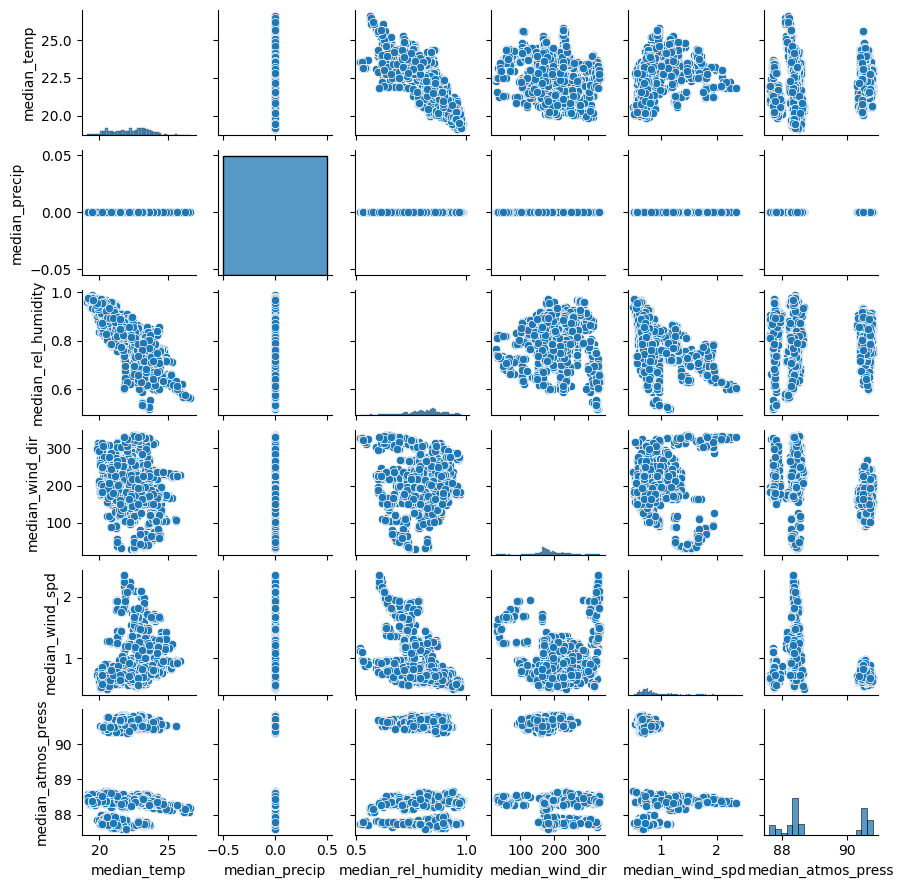

In [36]:
plt.figure()
sns.pairplot(train_data_mean, height=1.5);

In [ ]:
target_col=train_data[["target"]]
#combining the two dataframes
#df_merged= pd.concat([train_data_mean, target_data], ignore_index=True, sort=False)

In [ ]:
target_col.head

<bound method NDFrame.head of            target
0       45.126304
1       79.131702
2       32.661304
3       53.850238
4      177.418750
...           ...
15534   44.850286
15535   24.330455
15536   38.972128
15537   41.720952
15538  127.983333

[15539 rows x 1 columns]>

In [ ]:
frames=[train_data_mean, target_col]
df_final= pd.concat(frames)

In [ ]:
df_final.isnull().sum()

median_temp            18730
median_precip          18405
median_rel_humidity    20538
median_wind_dir        22782
median_wind_spd        22782
median_atmos_press     18330
target                 15539
dtype: int64

In [ ]:
df_final.head

<bound method NDFrame.head of        median_temp  median_precip  median_rel_humidity  median_wind_dir  \
0              NaN            NaN                  NaN              NaN   
1        23.791667            0.0             0.791000       153.164843   
2              NaN            NaN                  NaN              NaN   
3        19.541667            0.0             0.970167              NaN   
4              NaN            NaN                  NaN              NaN   
...            ...            ...                  ...              ...   
15534          NaN            NaN                  NaN              NaN   
15535          NaN            NaN                  NaN              NaN   
15536          NaN            NaN                  NaN              NaN   
15537          NaN            NaN                  NaN              NaN   
15538          NaN            NaN                  NaN              NaN   

       median_wind_spd  median_atmos_press      target  
0           

ZeroDivisionError: division by zero

<Figure size 640x480 with 0 Axes>

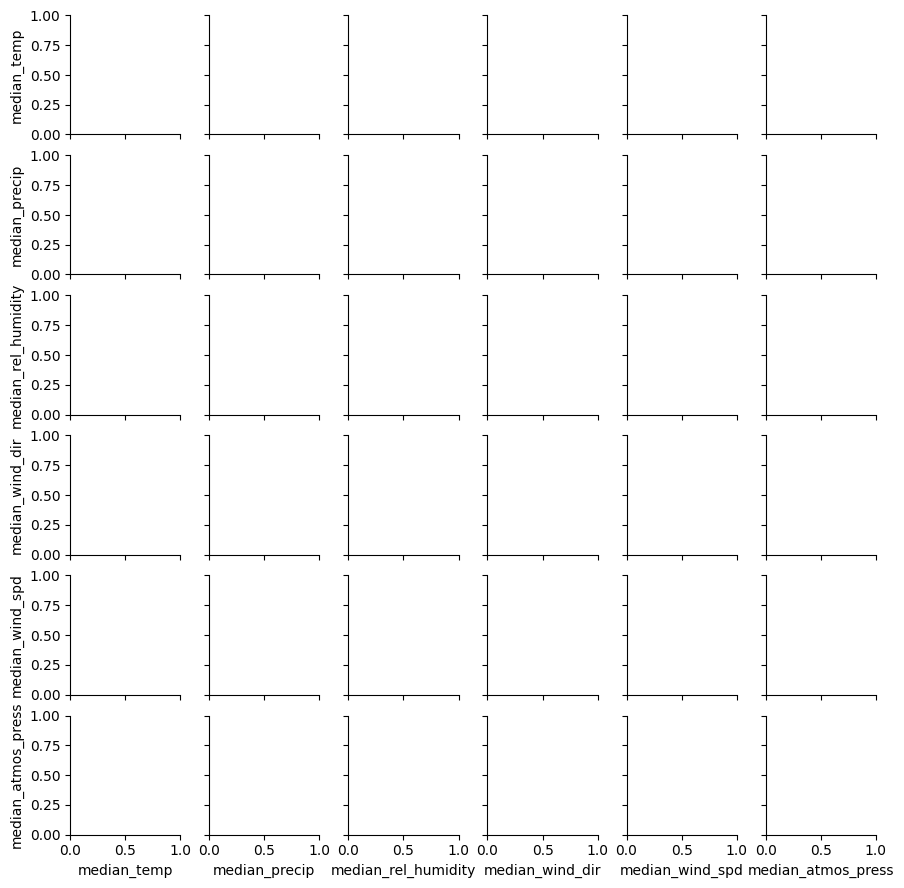

In [ ]:
#ploting scaterplots to see correlations but also outliers and normal distribution
plt.figure()
sns.pairplot(df_final, hue="target", height=1.5);

In [ ]:
df_final.isnull().sum()

median_temp            18730
median_precip          18405
median_rel_humidity    20538
median_wind_dir        22782
median_wind_spd        22782
median_atmos_press     18330
target                 15539
dtype: int64

In [ ]:
df_merged.isnull().sum()

In [ ]:
df_merged

In [ ]:
#ploting scaterplots to see correlations but also outliers and normal distribution
plt.figure(figsize = (25,20))
sns.pairplot(train_medium_data, hue="target", height=1.5);

In [ ]:
median_pressure vs target
win_speed vs target
X= train.median_atmos_press
y= train.target
for xcol, ax in zip (["s"])


In [ ]:
del data  
gc.collect()

#### Cross validation strategy (Kfold,or simple train test split )

In [ ]:
Experiment_name="simple_model"

In [ ]:
import os
os.makedirs("proc_data", exist_ok=True)
# os.makedirs("model_save/lgbm/{}".format(Experiment_name), exist_ok=True)
# os.makedirs("model_save/catboost/{}".format(Experiment_name), exist_ok=True)
# os.makedirs("model_save/xgboost/{}".format(Experiment_name), exist_ok=True)

In [ ]:
try : 
    folds=pd.read_csv("./proc_data/folds_id.csv")
    train=train.merge(folds,on="ID",how="left")
    train.fold.nunique()
except : 
    #  you run this cell  only for the first time 
    from sklearn.model_selection import KFold 
    kfold=KFold(n_splits=5,shuffle=True,random_state=2020) # change this random_state or all of you will have the same score  :D 
    train.reset_index(drop=True,inplace=True)
    folds=train[["ID"]].copy()
    folds["fold"]=0
    for fold,(tr_indx,val_ind) in enumerate(kfold.split(folds)) : 
        folds.loc[val_ind,"fold"]=fold
    folds.to_csv("./proc_data/folds_id.csv",index=False)
    train=train.merge(folds,on="ID",how="left")
    
    del folds

### Model 

### Lgbm 

In [ ]:
train.columns

In [ ]:
target_name="target"
id_name="ID"
features_to_remove=[target_name,id_name,"fold","location"]
features=train.columns.tolist()
features=[ fea for fea in  features if fea not in features_to_remove  ]


In [ ]:
from sklearn.metrics import mean_squared_error
def metric(y,x):
    return np.sqrt(mean_squared_error(x,y))

In [ ]:
import  lightgbm as lgbm 
import xgboost as xgb 
import catboost as cat 

In [ ]:
def train_function(model,train,test,params,other_params,target_name,features,metric):
    folds_num=train.fold.nunique()
    validation=train[[id_name,"fold",target_name]].copy()
    validation["pred_"+target_name]=0
    sub=test[[id_name]].copy()
    sub[target_name]=0
    for fold in np.sort(train.fold.unique()):
        print("#"*50+" {} ".format(fold)+"#"*50)
        os.makedirs("model_save/lgbm/{}/{}".format(Experiment_name,str(int(fold))), exist_ok=True)
        X_train=train[train.fold!=fold]
        X_val=train[train.fold==fold]
        
        train_pred,validation_pred,test_pred=model(X_train,X_val,test,params,other_params)
        
        validation.loc[validation.fold==fold,"pred_"+target_name]=validation_pred
        sub[target_name]+=test_pred/folds_num
        train_score=metric(X_train[target_name],train_pred)
        val_score=metric(X_val[target_name],validation_pred)
        print("train score : {} validation score : {}".format(round(train_score,4),round(val_score,4)))
    final_validation_score=metric(validation[target_name],validation["pred_"+target_name])
    print("final validation score : {}".format(final_validation_score))
        
    return sub,validation,final_validation_score

def lgbm_model(X_train,X_val,X_test,params,other_params):
    dtrain = lgbm.Dataset(data=X_train[features], label=X_train[target_name], feature_name=features)
    dval = lgbm.Dataset(data=X_val[features], label=X_val[target_name], feature_name=features)

    model = lgbm.train(
        params=params,
        train_set=dtrain,
        num_boost_round=other_params["num_boost_round"],
        valid_sets=(dtrain, dval),
        early_stopping_rounds=other_params["early_stopping_rounds"],
        verbose_eval=other_params["verbose_eval"],
    )        
    best_iteration = model.best_iteration
    train_pred=model.predict(X_train[features], num_iteration=best_iteration)
    validation_pred=model.predict(X_val[features], num_iteration=best_iteration)
    test_pred=model.predict(test[features], num_iteration=best_iteration)
        
    return train_pred,validation_pred,test_pred

In [ ]:
other_params={"num_boost_round":50000000,
              "early_stopping_rounds":50,
              "verbose_eval":1000,
}
lgbm_params = {
    "bagging_fraction": 0.8,
    "bagging_freq": 2,
    "boosting_type": "gbdt",
    "feature_fraction": 0.8,
    "learning_rate": 0.01,
    "max_depth": 8,
    "num_threads": 16,
    "objective": "regression",
    "metric": "rmse",
    "seed": 2020,
}

In [ ]:
sub,validation,score=train_function(model=lgbm_model,
                                    train=train,
                                    test=test,
                                    params=lgbm_params,
                                    other_params=other_params,
                                    target_name=target_name,
                                    features=features,
                                    metric=metric)

In [ ]:
os.makedirs("subs", exist_ok=True)

In [ ]:
sub.to_csv("./subs/lgbm_{}.csv".format(round(score,2)),index=False)

In [ ]:
#ploting scaterplots to see correlations but also outliers and normal distribution
plt.figure(figsize = (25,20))
sns.pairplot(df_train, hue="alcohol", height=1.5);